In [ ]:
#import csv file and read it using uploaded
from google.colab import drive
import pandas as pd
import sklearn.model_selection
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.api as smg

import numpy as np



Mounted at /content/drive


In [ ]:
file_path = file_path = '/content/drive/MyDrive/Cars.csv'
cars = pd.read_csv(file_path)
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#t and p-Values
model = cars[['MPG', 'HP','VOL','SP','WT']]
model

,MPG,HP,VOL,SP,WT
0,53.700681,49,89,104.185353,28.762059
1,50.013401,55,92,105.461264,30.466833
2,50.013401,55,92,105.461264,30.193597
3,45.696322,70,92,113.461264,30.632114
4,50.504232,53,92,104.461264,29.889149
...,...,...,...,...,...
76,36.900000,322,50,169.598513,16.132947
77,19.197888,238,115,150.576579,37.923113
78,34.000000,263,50,151.598513,15.769625
79,19.833733,295,119,167.944460,39.423099


In [ ]:
model.corr()

,MPG,HP,VOL,SP,WT
MPG,1.000000,-0.725038,-0.529057,-0.687125,-0.526759
HP,-0.725038,1.000000,0.077459,0.973848,0.076513
VOL,-0.529057,0.077459,1.000000,0.102170,0.999203
SP,-0.687125,0.973848,0.102170,1.000000,0.102439
WT,-0.526759,0.076513,0.999203,0.102439,1.000000


In [ ]:
w
X = model[['HP','VOL','SP','WT']]
y = model['MPG']
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


## **Simple Linear Regression Models**





In [ ]:
import statsmodels.formula.api as smf

ml_v = smf.ols('MPG ~ VOL', data=cars).fit()

# t and p-values
print(ml_v.params, '\n', ml_v.pvalues)



Intercept    55.817089
VOL          -0.216625
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
ml_wv = smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.params,'\n',ml_wv.pvalues)

Intercept    56.884658
WT            1.434917
VOL          -0.698341
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [ ]:
# R-squared and Adjusted R-squared for ml_v
print(ml_v.rsquared, '\n' ,ml_v.rsquared_adj)


0.27990086511227075 
 0.27078568618964116


In [ ]:
#R-squared and adjusted R-Squared for lm_wv
print(ml_wv.rsquared,'\n' ,ml_wv.rsquared_adj)

0.2821095616445982 
 0.2637021145072803


In [ ]:
import statsmodels.formula.api as smf
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data=cars).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)  # 16.33

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data=cars).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)  # 564.98

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data=cars).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)  # 564.84

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data=cars).fit().rsquared
vif_sp = 1 / (1 - rsq_sp)  # 16.35

# Storing VIF values in a DataFrame
vif_data = pd.DataFrame({
    "Variables": ["HP", "WT", "VOL", "SP"],
    "VIF": [vif_hp, vif_wt, vif_vol, vif_sp]
})

# Display the VIF DataFrame
vif_data

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


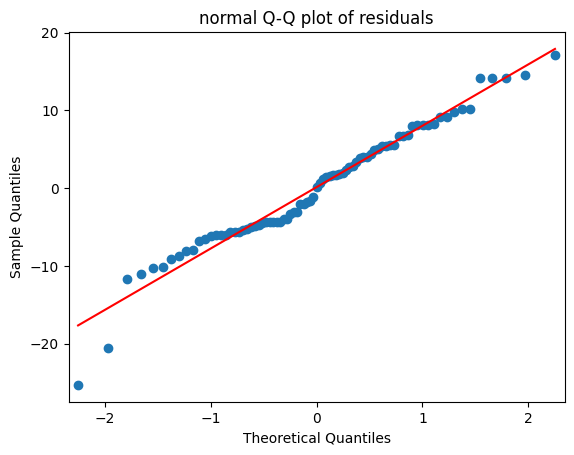

In [ ]:
import statsmodels.api as sm
qqplots = sm.qqplot(ml_v.resid, line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(ml_v.resid>10))

[array([ 0,  1,  2,  4,  6, 21, 28])]

Residual plot for homoscedasticity


In [ ]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

Text(0, 0.5, 'Standardized Residuals')

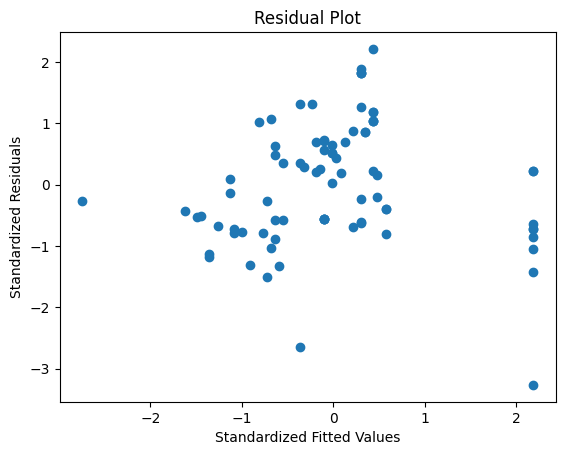

In [ ]:
plt.scatter(get_standardized_values(ml_v.fittedvalues),
            get_standardized_values(ml_v.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')

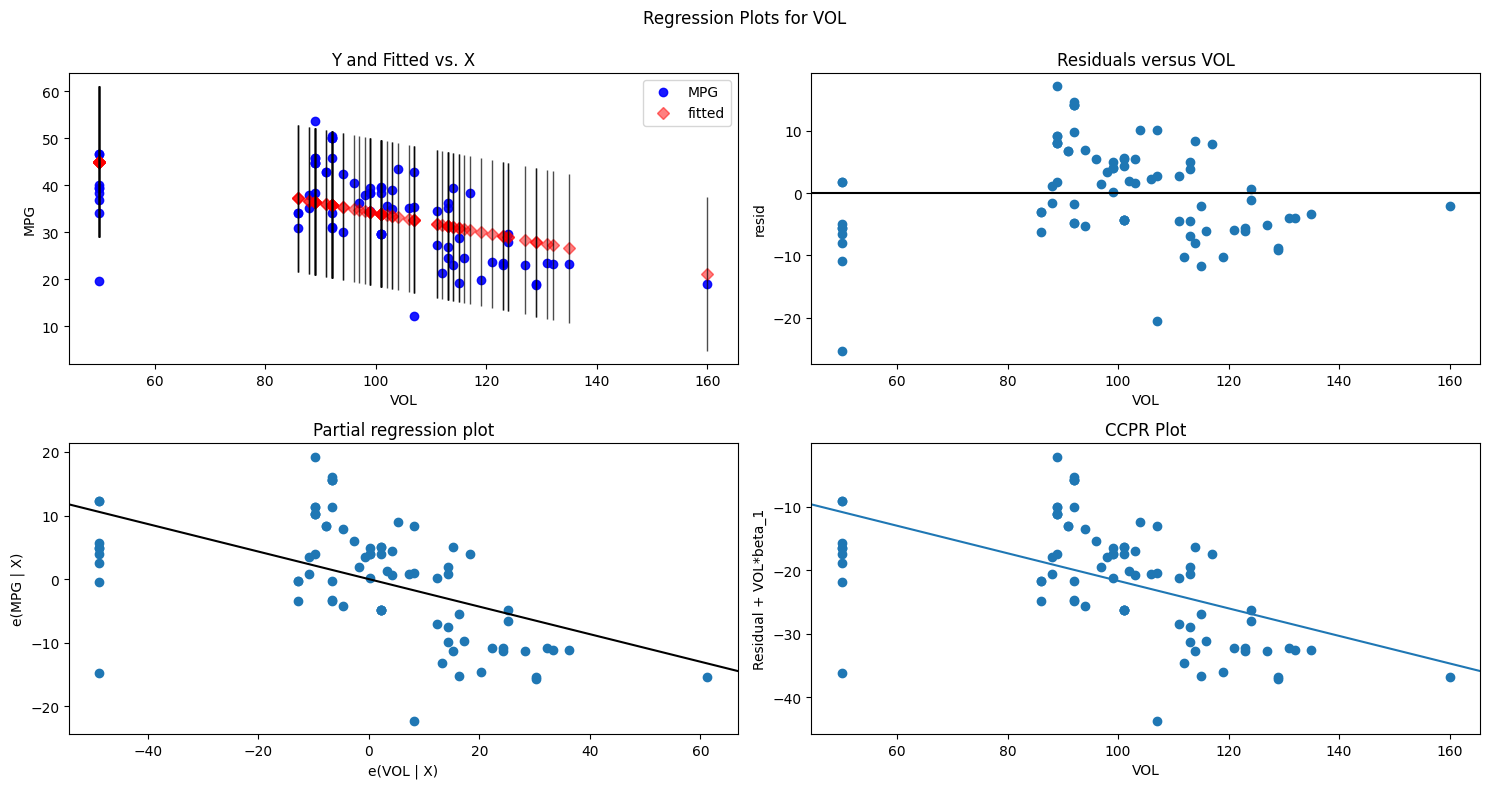

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_v, 'VOL', fig=fig)
plt.show()

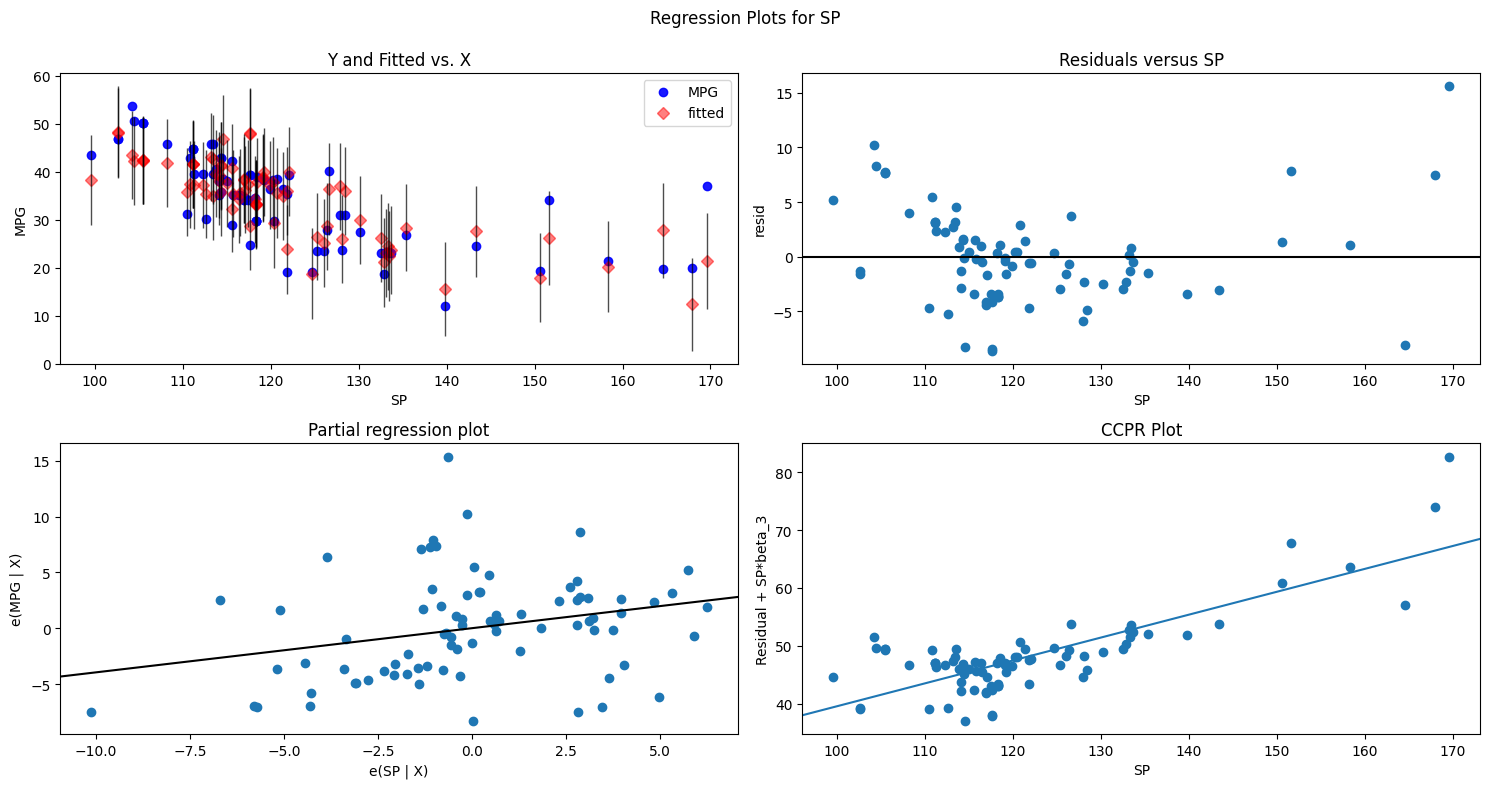

In [ ]:
ml_model = smf.ols('MPG ~ HP + VOL + SP + WT', data=cars).fit()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'SP', fig=fig)
plt.show()

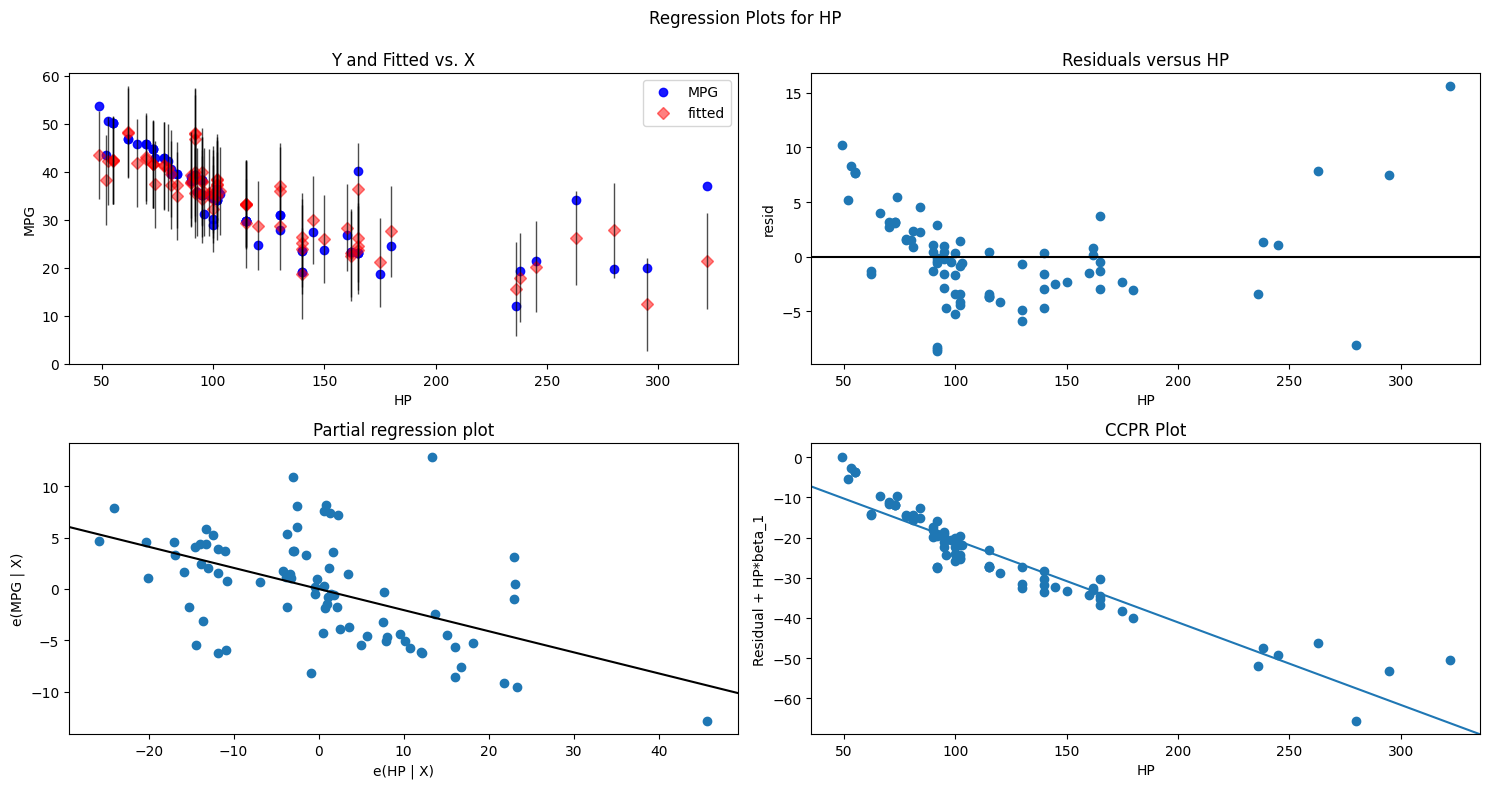

In [ ]:
# Ensure the model includes all required variables
ml_model = smf.ols('MPG ~ HP + VOL + SP + WT', data=cars).fit()

# Now plot regression diagnostics for HP
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_model, 'HP', fig=fig)
plt.show()


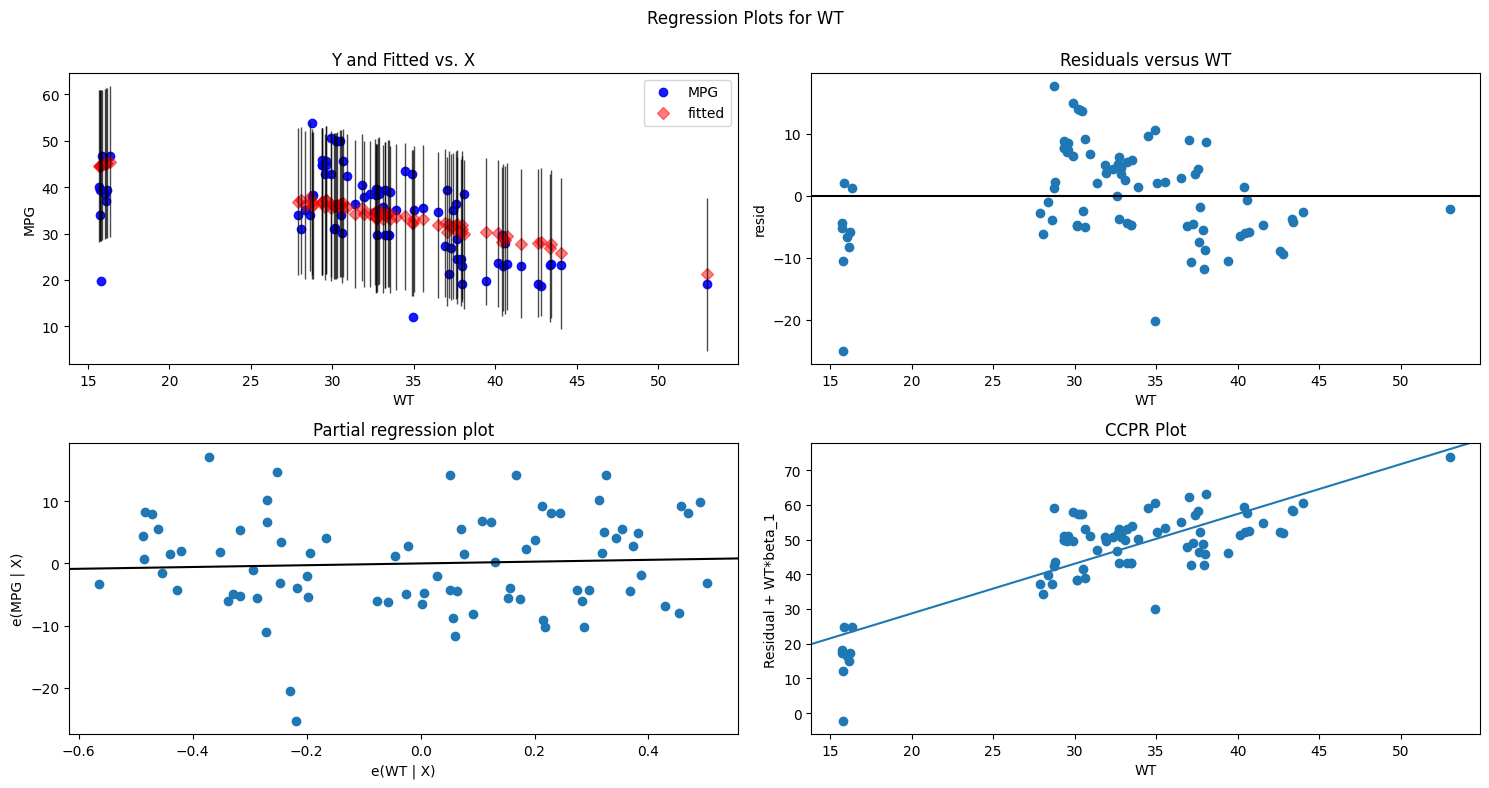

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_wv, 'WT', fig=fig)
plt.show()